### Importing Libraries:

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Loading Data:

In [2]:
df=pd.read_csv(r"C:\Users\Vishal S\OneDrive\Desktop\email.csv")
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,"UpgrdCentre Orange customer, you may now claim...",Spam
2,3,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
3,4,The guy did some bitching but I acted like i'd...,Non-Spam
4,5,"Pity, * was in mood for that. So...any other s...",Non-Spam
...,...,...,...
2022,2023,Subject: re : research and development charges...,Non-Spam
2023,2024,"Subject: re : receipts from visit jim , than...",Non-Spam
2024,2025,Subject: re : enron case study update wow ! a...,Non-Spam
2025,2026,"Subject: re : interest david , please , call...",Non-Spam


### Data Analysis:

In [3]:
df.shape

(2027, 3)

In [4]:
df.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        2027 non-null   int64 
 1   Message_body  2027 non-null   object
 2   Label         2027 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.6+ KB


In [8]:
df['Label'].value_counts()

Label
Non-Spam    1030
Spam         997
Name: count, dtype: int64

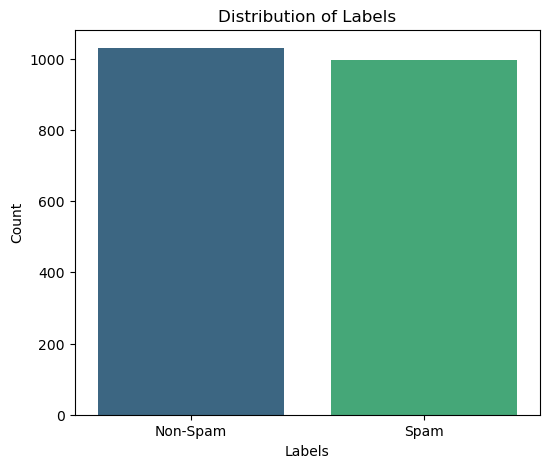

In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
label_counts = df['Label'].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.show()

### Exploring Message_body:

In [10]:
df['Message_body'][1557]

'Subject: easy - tag board : : more options to fit your site  thank you for your interest in easy - tag board . our goal is to provide you with the best software and support possible . we know you have a choice and appreciate the opportunity to assist with your online needs . we are confident that you will see the benefits of using the easy - tag board .  highly customizable easy to configure fast , reliable , & secure  server o / s independent cross - browser compatible more features text - decoration : none " face = arial , helvetica , sans - serif > www . easy - tagboard . com  you are receiving this email because you opted - in to our mailing list or someone you know referred you to us . we respect your right to privacy and your desire not to be bothered by unwanted emails . if you do not wish to receive any further newsletters , please click the link below to be permanently removed from out mailing list .  to unsubscribe click ( here ) .'

### Converting Words into Categorical values:

In [11]:
le=LabelEncoder()
df['Label']=le.fit_transform(df['Label'])

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vishal
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Cleaning:

In [13]:
def clean(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove extra spaces
    text = " ".join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

In [14]:
df['Message_body']=df['Message_body'].apply(clean)

### Vectorization:

In [15]:
cv=TfidfVectorizer()
X=cv.fit_transform(df.Message_body.values).toarray()
X=pd.DataFrame(X,columns=cv.get_feature_names_out())

### Splitting Data:

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X, df.Label, test_size=0.2, random_state=17)

In [17]:
x_test.shape

(406, 15797)

In [18]:
x_train.shape

(1621, 15797)

### Now Let's Train the Model and print the Classification Report:

### KNN:

In [19]:
from sklearn.multiclass import OneVsRestClassifier
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.6256
Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       208
           1       1.00      0.23      0.38       198

    accuracy                           0.63       406
   macro avg       0.79      0.62      0.55       406
weighted avg       0.78      0.63      0.56       406



### SVM:

In [20]:
from sklearn.svm import SVC
svc = OneVsRestClassifier(SVC())
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9557
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       208
           1       0.99      0.91      0.95       198

    accuracy                           0.96       406
   macro avg       0.96      0.95      0.96       406
weighted avg       0.96      0.96      0.96       406



### Random Forest:

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9433
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       208
           1       0.97      0.91      0.94       198

    accuracy                           0.94       406
   macro avg       0.95      0.94      0.94       406
weighted avg       0.95      0.94      0.94       406



### Logistic Regression:

In [21]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Accuracy: 0.9532
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       208
           1       0.98      0.92      0.95       198

    accuracy                           0.95       406
   macro avg       0.96      0.95      0.95       406
weighted avg       0.95      0.95      0.95       406



### Decision tree:

In [22]:

dt = OneVsRestClassifier(DecisionTreeClassifier())
dt.fit(x_train, y_train)
y_pred_rf = dt.predict(x_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9286
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       208
           1       0.92      0.93      0.93       198

    accuracy                           0.93       406
   macro avg       0.93      0.93      0.93       406
weighted avg       0.93      0.93      0.93       406



### Conclusion :
1) KNN:0.6256
2) SVM:0.9447
3) RF:0.9458
4) Log:0.9458
5) DT:0.9261

### Therefore Logistic Regression is giving the highest Accuracy for the above dataset.

### Saving the Model:

In [23]:
import joblib

# Save the trained model and vectorizer
joblib.dump(log, "spam.joblib")  
joblib.dump(cv, "tfidf.joblib")

['tfidf.joblib']

### Prediction system:

In [24]:
# Function to predict the category of a resume
def pred(input):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = clean(input) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = cv.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = log.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [25]:
mymail="""Subject: Urgent: Your Account Will Be Suspended in 24 Hours

Dear vishal,

We recently detected unusual activity on your account and suspect unauthorized access. For your security, we have temporarily limited certain functions of your account.

To restore full access, please verify your account details immediately by clicking the secure link below:

👉 Verify My Account

If you do not verify within 24 hours, your account will be permanently suspended.

Thank you for your prompt attention to this matter."""

pred(mymail)

'Spam'

In [26]:
mymail="""Subject: Interview Invitation for Data Scientist Role – [Company Name]

Dear [Your Name],

We are pleased to inform you that your application for the Data Scientist position at [Company Name] has been shortlisted. We would like to invite you for an interview to discuss your qualifications further.

Interview Details:
📅 Date: [Date]
⏰ Time: [Time]
📍 Location: [Company Office/Virtual Meeting Link]

Please confirm your availability by replying to this email. If the proposed time does not work for you, kindly suggest an alternative slot.

We look forward to speaking with you."""

pred(mymail)

'Non-Spam'